<ipython-input-2-b32e8d9c4c8c>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image_path)


Menampilkan gambar asli dengan Gaussian blur:


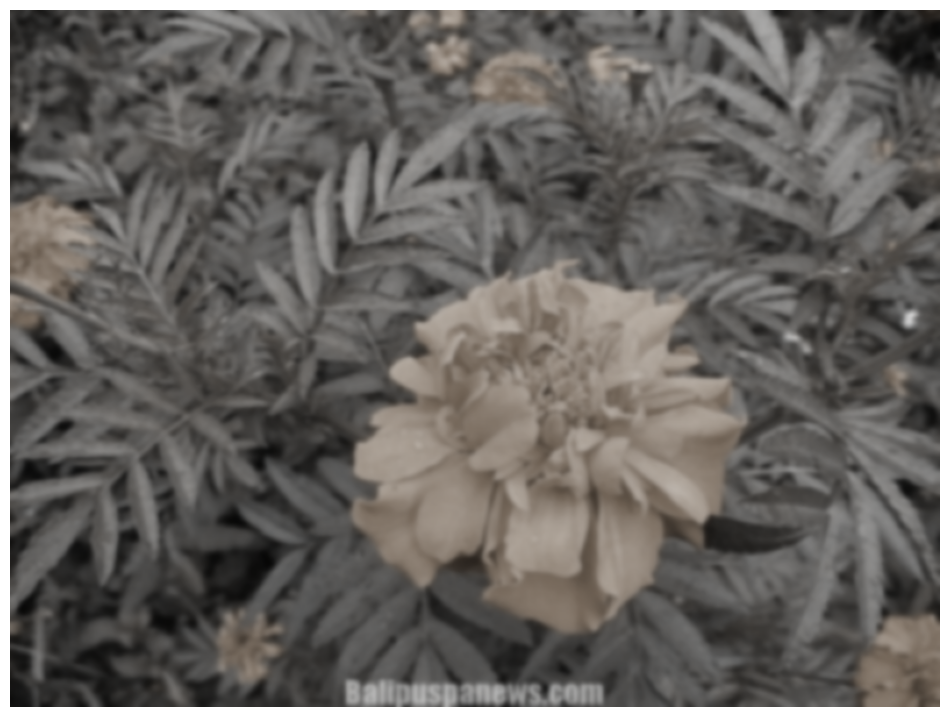

Menampilkan gambar dengan white noise:


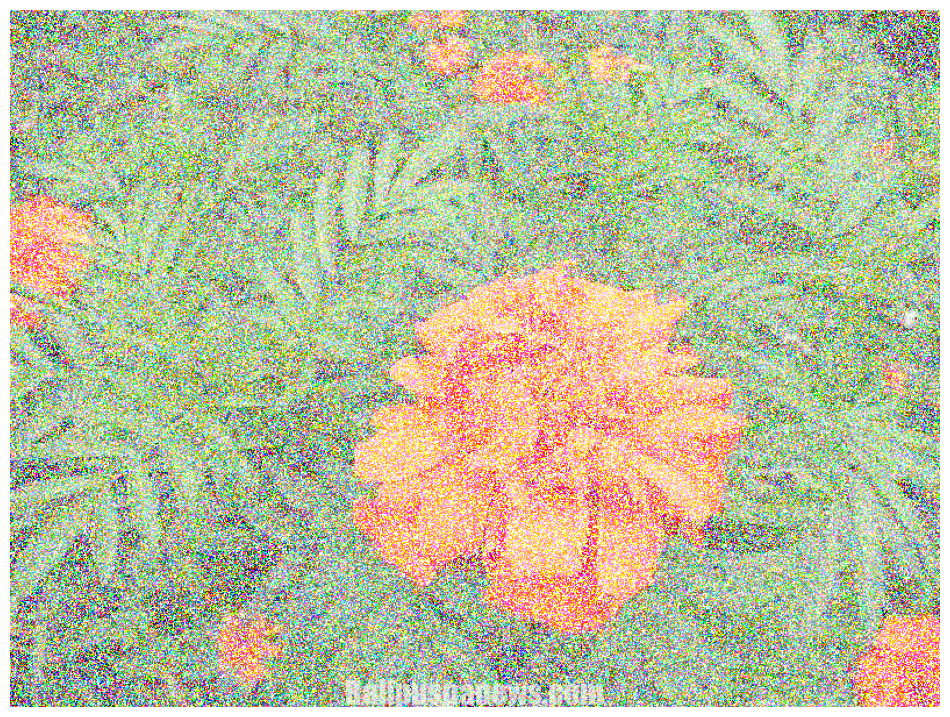

Menampilkan gambar dengan black noise:


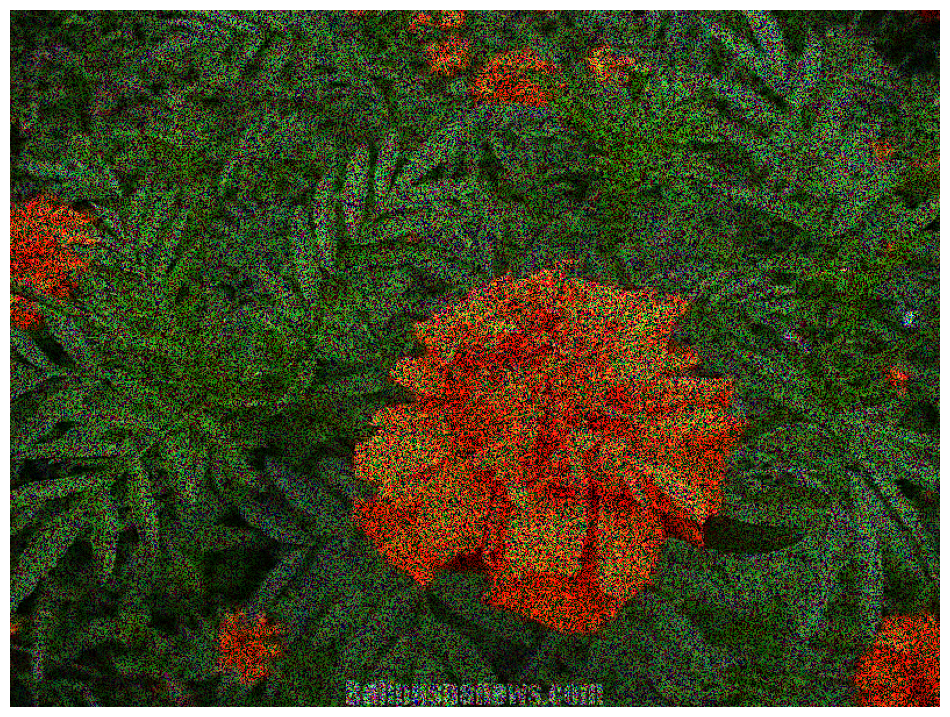

Menampilkan gambar hasil deteksi tepi:


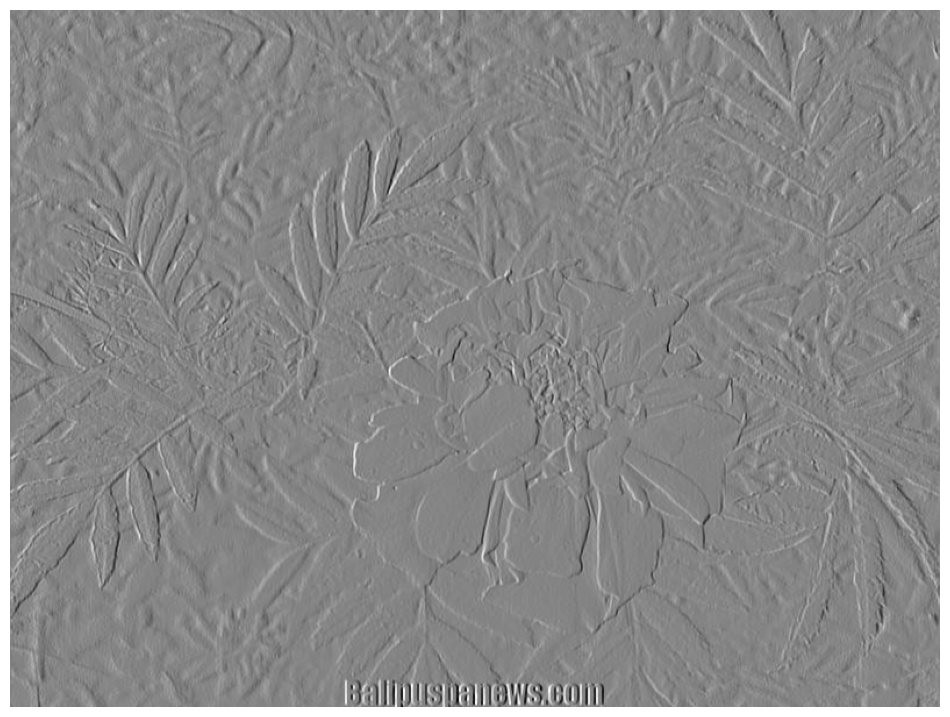

In [2]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Fungsi untuk memuat gambar menggunakan imageio
def load_image(image_path):
    # Memuat gambar menggunakan imageio
    img = imageio.imread(image_path)
    if img.ndim == 3 and img.shape[2] == 4:  # Cek jika gambar memiliki alpha channel (RGBA)
        img = img[..., :3]  # Menghapus saluran alpha jika ada
    return img

# Fungsi untuk mengonversi gambar ke grayscale
def rgb_to_grayscale(img):
    # Konversi citra RGB ke grayscale dengan formula R*0.299 + G*0.587 + B*0.114
    return np.dot(img[...,:3], [0.299, 0.587, 0.114])

# Fungsi untuk menampilkan gambar
def display_img(img, cmap=None, figsize=(12, 10)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')  # Menyembunyikan sumbu agar tampilan lebih jelas
    plt.show()

# Fungsi untuk menerapkan Gaussian Blur menggunakan scipy.ndimage
def apply_gaussian_blur(img, sigma=2):
    return ndimage.gaussian_filter(img, sigma=sigma)

# Fungsi untuk menambahkan noise putih (white noise)
def add_white_noise(img):
    noise = np.random.randint(0, 2, size=img.shape) * 255
    noisy_img = np.copy(img)
    noisy_img[noise == 255] = 255
    return noisy_img

# Fungsi untuk menambahkan noise hitam (black noise)
def add_black_noise(img):
    noise = np.random.randint(0, 2, size=img.shape) * -255
    noisy_img = np.copy(img)
    noisy_img[noise == -255] = 0
    return noisy_img

# Fungsi untuk deteksi tepi menggunakan Sobel operator
def edge_detection(img):
    # Menggunakan Sobel operator untuk mendeteksi tepi di gambar
    gray_img = rgb_to_grayscale(img)  # Mengonversi gambar ke grayscale
    edge_img = ndimage.sobel(gray_img)  # Menggunakan Sobel operator untuk deteksi tepi
    return edge_img

# Fungsi utama untuk memproses gambar
def process_image(image_path):
    img = load_image(image_path)

    # Terapkan Gaussian Blur
    blurred_img = apply_gaussian_blur(img, sigma=2)

    # Tambahkan White Noise dan Black Noise
    white_noise_img = add_white_noise(img)
    black_noise_img = add_black_noise(img)

    # Deteksi tepi menggunakan Sobel operator
    edge_img = edge_detection(img)

    # Menampilkan gambar yang telah diproses
    print("Menampilkan gambar asli dengan Gaussian blur:")
    display_img(blurred_img)

    print("Menampilkan gambar dengan white noise:")
    display_img(white_noise_img, cmap='gray')

    print("Menampilkan gambar dengan black noise:")
    display_img(black_noise_img, cmap='gray')

    print("Menampilkan gambar hasil deteksi tepi:")
    display_img(edge_img, cmap='gray')

# Ganti dengan path gambar yang ingin digunakan
image_path = '/content/kembang-kenikir1.jpg'  # Ganti dengan path gambar Anda

# Jalankan fungsi pemrosesan gambar
process_image(image_path)
